In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.constants import electron_mass, Rydberg, h, c, e

### 1. Binding Energy

For weakly bound (Wannier) excitons: $E_X = E_g + \frac{\hbar^2 {k_X}^2}{2m_X} - \frac{R_X}{n^2} \approx E_g - \frac{R_X}{n^2}$ 

Therefore plot $E_X$ against $\frac{1}{n^2}$ to determine $E_g$ and $R_X$


In [2]:
E = np.array([2.14, 2.153, 2.158, 2.160])
n = np.array([2, 3, 4, 5])

In [3]:
def func(x, a, b):
    return a - b/(x**2)

In [4]:
popt, pcov = curve_fit(func, n, E)
E_g_err, R_X_err = np.sqrt(np.diag(pcov))

In [5]:
E_g, R_X = popt

In [6]:
print(f"Band Gap, E_g: ({E_g:.4f} +- {E_g_err:.4f}) eV")
print(f"Binding Energy, (R_X: {R_X:.4f} +- {R_X_err:.4f}) eV")

Band Gap, E_g: (2.1638 +- 0.0002) eV
Binding Energy, (R_X: 0.0955 +- 0.0011) eV


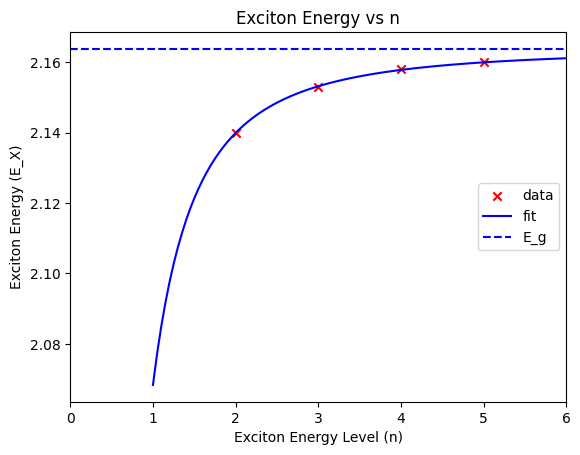

In [7]:
x = np.linspace(1, 6, 101)
plt.scatter(n, E, c='r', marker='x', label='data')
plt.plot(x, func(x, *popt), c='b', label='fit')
plt.hlines(E_g, xmin=0, xmax=6, colors='blue', linestyles='dashed', label='E_g')
plt.xlim(0, 6)
plt.xlabel('Exciton Energy Level (n)')
plt.ylabel('Exciton Energy (E_X)')
plt.title('Exciton Energy vs n')
plt.legend(loc='center right')

### 2. Electron-Hole Reduced Mass

For weakly bound (Wannier) excitons: $R_X = \frac{\mu}{m_e \epsilon_r^2}R_y$

I.e. just correct the hydrogen case for different mass (now the electron-hole reduced mass $\mu$) and different electric permittivity (now $\epsilon_r$)

Rearranging $\mu = m_e \epsilon_r^2 \frac{R_X}{R_y}$ where $R_y$ is the Rydberg Constant times $hc$

Assuming $\epsilon_r \approx \epsilon_{\infty} = 10$

In [8]:
mu = electron_mass * (10 ** 2) * (R_X / (Rydberg * h * c * (1 / e)))
mu_err = (R_X_err / R_X) * mu

In [9]:
print(f"Electron-Hole Reduced Mass, mu = ({mu * (1 / electron_mass):.4f} \
+- {mu_err * (1 / electron_mass):.4f}) m_e")

Electron-Hole Reduced Mass, mu = (0.7018 +- 0.0084) m_e
